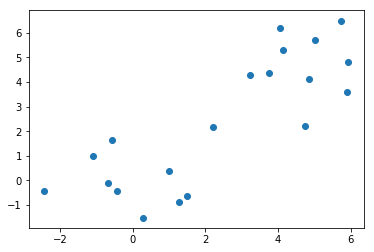

[ 2.14037745  1.2763927 ]
-9


In [24]:
import numpy as np
import matplotlib.pyplot as plt

rng=np.random.RandomState(123)
d=2
N=10
mean=5
x1=rng.randn(N,d)+np.array([0,0])
x2=rng.randn(N,d)+np.array([mean,mean])

x=np.concatenate((x1,x2),axis=0)

line = plt.figure()

plt.scatter (x[:,0], x[:,1])
plt.show()

# definition of perceptoron
w=np.zeros(d)
b=0

def y(x):
    return step(np.dot(w,x)+b)
def step(x):
    return 1*(x>0)
def t(i):
    if i<N:
        return 0
    else:
        return 1

    
while True:
    classified = True
    for i in range(N*2):
        delta_w=(t(i)-y(x[i]))*x[i]
        delta_b=(t(i)-y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w==0)*(delta_b==0)
    if classified:
        break
        
print(w)
print(b)




In [35]:
# perceptron with tensorFlow
import numpy as np
import tensorflow as tf

w= tf.Variable(tf.zeros([2,1]))
b= tf.Variable(tf.zeros([1]))

x=tf.placeholder(tf.float32,shape=[None,2])
t=tf.placeholder(tf.float32,shape=[None,1])
y=tf.nn.sigmoid(tf.matmul(x,w)+b)

cross_entropy=-tf.reduce_sum(t*tf.log(y)+(1-t)*tf.log(1-y))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction=tf.equal(tf.to_float(tf.greater(y,0.5)),t)

# OR gate
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([[0],[1],[1],[1]])

init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

# training
for epoch in range(200):
    sess.run(train_step,feed_dict={
        x:X,
        t:Y
    })
    
#display results

classified=correct_prediction.eval(session=sess, feed_dict={
    x:X,
    t:Y
})
print (classified)

prob=y.eval(session=sess, feed_dict={
    x:X,
    t:Y  
})
print (prob)

print ('w: ', sess.run(w))
print('b: ', sess.run(b))

[[ True]
 [ True]
 [ True]
 [ True]]
[[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]
w:  [[ 3.61188436]
 [ 3.61188436]]
b:  [-1.24509501]


In [41]:
# OR gate with Keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model=Sequential([
    Dense(input_dim=2, units=1),
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

# OR gate
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([[0],[1],[1],[1]])

model.fit(X,Y, epochs=200, batch_size=1)

classes= model.predict_classes (X, batch_size=1)
prob=model.predict_proba(X, batch_size=1)

print()
print('classified: ')
print(Y == classes)
print()
print('output probability: ')
print(prob)

Epoch 1/200
4/4 [==============================] - 0s - loss: 0.5649     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.5287     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.5008     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.4784     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.4605     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.4454     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.4326     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.4217     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.4120     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.4034     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.3958     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.3890     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.3827     
Epoch 14/200
4/4 [================

4/4 [==============================] - 0s - loss: 0.1653     
Epoch 111/200
4/4 [==============================] - 0s - loss: 0.1643     
Epoch 112/200
4/4 [==============================] - 0s - loss: 0.1633     
Epoch 113/200
4/4 [==============================] - 0s - loss: 0.1623     
Epoch 114/200
4/4 [==============================] - 0s - loss: 0.1614     
Epoch 115/200
4/4 [==============================] - 0s - loss: 0.1604     
Epoch 116/200
4/4 [==============================] - 0s - loss: 0.1595     
Epoch 117/200
4/4 [==============================] - ETA: 0s - loss: 0.007 - 0s - loss: 0.1585     
Epoch 118/200
4/4 [==============================] - 0s - loss: 0.1576     
Epoch 119/200
4/4 [==============================] - 0s - loss: 0.1567     
Epoch 120/200
4/4 [==============================] - 0s - loss: 0.1558     
Epoch 121/200
4/4 [==============================] - 0s - loss: 0.1549     
Epoch 122/200
4/4 [==============================] - 0s - loss: 0.1540     
Ep